In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report

In [19]:
iris=load_iris()

In [21]:
X,y=iris.data,iris.target

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
model = DecisionTreeClassifier(max_depth=3, random_state=42) 
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_train,y_train_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_train,y_train_pred))



Decision Tree Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.98      0.94        41
           2       0.97      0.90      0.93        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [103]:
accuracy = accuracy_score(y_test,y_test_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test,y_test_pred))

Decision Tree Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



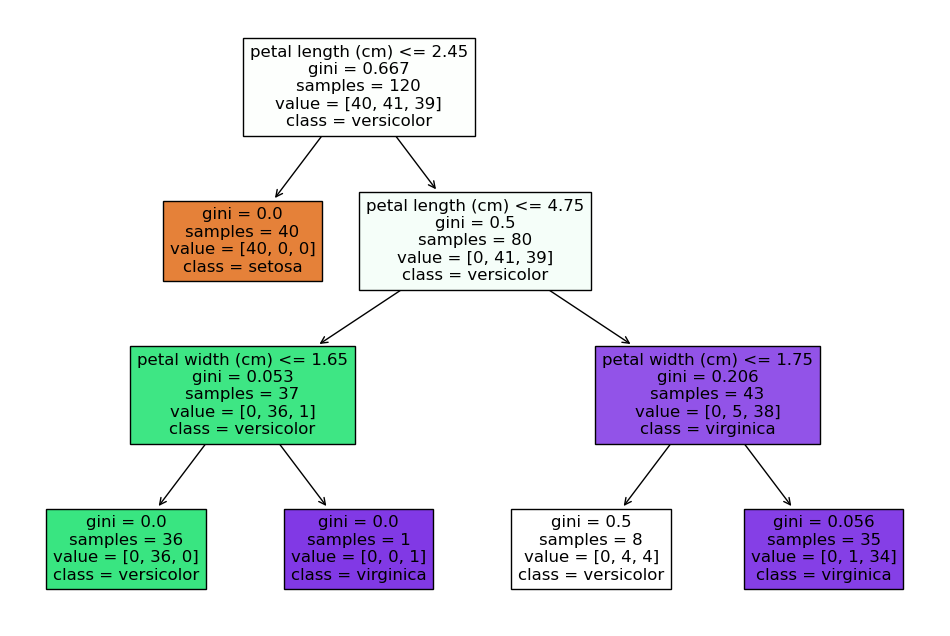

In [105]:
# Visualize 
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [107]:
# let's do prepruning now

In [109]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt','log2']
}

In [111]:
from sklearn.model_selection import GridSearchCV

In [113]:
tree_model=DecisionTreeClassifier()
cv=GridSearchCV(tree_model,param_grid=parameter,cv=5,scoring='accuracy')

In [115]:
cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [117]:
best_model = cv.best_estimator_

In [119]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [121]:
y_pred=cv.predict(X_test)

In [123]:
score=accuracy_score(y_pred,y_test)

In [125]:
score

0.9666666666666667

In [127]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

